# Image color picker 

## Goal
pick out colors of article of clothing and convert to readable form (eg purple, magenta).

## First experiment - KMeans clustering of color

Based on: https://stackoverflow.com/questions/37022787/color-detection-of-object-in-image

In [1]:
!pip install pillow

In [2]:
import matplotlib.image as mpimg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import patches
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image

In [3]:
img = mpimg.imread('./red-skirt.jpg')
pimg = Image.open('./red-skirt.jpg')
img.shape

(440, 333, 3)

Transform image to list of individual pixels for clustering

In [4]:
image_array = np.array(img, dtype=np.float64) / 255 # convert to float and scale 0 - 1
w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual pixels

image_array[:5]

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Fit KMeans Model

In [5]:
n_colors = 3 ## 

t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
centroids = kmeans.cluster_centers_ ## image average colors
t1 = time()

print('fit time: {0} s'.format(t1 - t0))


centroids

fit time: 0.027006864547729492 s


array([[ 0.99771678,  0.99719971,  0.99711256],
       [ 0.8921686 ,  0.02874251,  0.09613714],
       [ 0.92499379,  0.14167287,  0.22670638]])

centeroids represent 3 average colors in the image

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


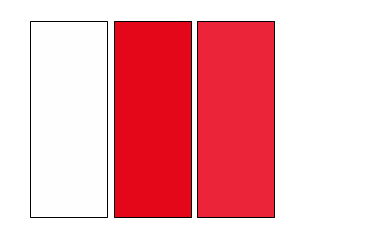

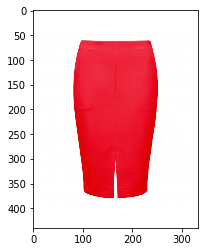

In [6]:
fig = plt.figure()

plt.axis('off')
ax = fig.add_subplot(111)

x_from = 0.00



for cluster_center in kmeans.cluster_centers_:
    ax.add_patch(patches.Rectangle( (x_from, 0.05), 0.23, 0.9, alpha=None, facecolor=tuple(cluster_center), edgecolor='black') )
    x_from = x_from + 0.25

plt.show()
plt.imshow(pimg)
plt.show()

## Evaluate colors

In [7]:
def find_n_best_colors(n, image_array):
    image_array = np.array(image_array, dtype=np.float64) / 255 # convert to float and scale 0 - 1
    w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
    image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual
    
    image_array_sample = shuffle(image_array, random_state=0)[:1000] # sample 1000 random pixels
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample) # find n clusters
    centroids = kmeans.cluster_centers_
    
    return centroids
    
def plot_colors_and_image(colors, img):
    fig = plt.figure()

    plt.axis('off')
    ax = fig.add_subplot(111)

    x_from = 0.00
    
    n = len(colors)
    
    for c in colors:
        ax.add_patch(patches.Rectangle( (x_from, 0.05), ((1/n) - 0.02), 0.9, alpha=None, facecolor=tuple(c), edgecolor='black') )
        x_from = x_from + (1/n)

    if img is None:
        return
    
    plt.show()
    plt.imshow(img)
    plt.show()


In [8]:
image_array = mpimg.imread('./dark-red-dress.jpg')
pil_img = Image.open('./dark-red-dress.jpg')

colors = find_n_best_colors(5, image_array)
colors

array([[ 0.50103605,  0.05570682,  0.20816851],
       [ 0.99791119,  0.99774948,  0.99813355],
       [ 0.70196078,  0.48039216,  0.54754902],
       [ 0.36993464,  0.01477124,  0.14457516],
       [ 0.54151409,  0.0888456 ,  0.22708739]])

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


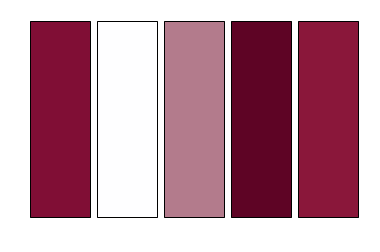

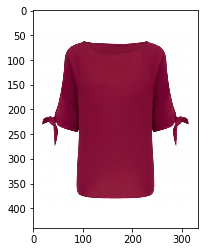

In [9]:
plot_colors_and_image(colors, pil_img)

## Convert color to text

In [10]:
safe = mcolors.CSS4_COLORS

safe

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [11]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    rgb_int = tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3)) ## 255, 255, 255
    rgb_fl = tuple(i / 255 for i in rgb_int)
    
    return rgb_fl

safe_map = { hex_to_rgb(v):k for (k,v) in safe.items()}
safe_map

{(0.0, 0.0, 0.0): 'black',
 (0.0, 0.0, 0.5019607843137255): 'navy',
 (0.0, 0.0, 0.5450980392156862): 'darkblue',
 (0.0, 0.0, 0.803921568627451): 'mediumblue',
 (0.0, 0.0, 1.0): 'blue',
 (0.0, 0.39215686274509803, 0.0): 'darkgreen',
 (0.0, 0.5019607843137255, 0.0): 'green',
 (0.0, 0.5019607843137255, 0.5019607843137255): 'teal',
 (0.0, 0.5450980392156862, 0.5450980392156862): 'darkcyan',
 (0.0, 0.7490196078431373, 1.0): 'deepskyblue',
 (0.0, 0.807843137254902, 0.8196078431372549): 'darkturquoise',
 (0.0, 0.9803921568627451, 0.6039215686274509): 'mediumspringgreen',
 (0.0, 1.0, 0.0): 'lime',
 (0.0, 1.0, 0.4980392156862745): 'springgreen',
 (0.0, 1.0, 1.0): 'cyan',
 (0.09803921568627451,
  0.09803921568627451,
  0.4392156862745098): 'midnightblue',
 (0.11764705882352941, 0.5647058823529412, 1.0): 'dodgerblue',
 (0.12549019607843137,
  0.6980392156862745,
  0.6666666666666666): 'lightseagreen',
 (0.13333333333333333, 0.5450980392156862, 0.13333333333333333): 'forestgreen',
 (0.180392156862

Calculate distance of input to each color point in the list and sort

In [12]:
from scipy.spatial import distance

def get_distance(x,y):
    
    if len(x) == 4:
        x = (x[0], x[1], x[2])
        
    if len(y) == 4:
        y = (y[0], y[1], y[2])
    
    return distance.euclidean(x,y)

def get_closest_point(p, pxs):
    d_min = None
    p_min = None
    
    for px in pxs:
        d = get_distance(p, px)
        
        if d_min is None or d < d_min:
            d_min = d
            p_min = px
        
    return p_min

def get_closest_color(c, colormap):
    named_c = get_closest_point(c, list(colormap.keys()))  
    return colormap[named_c]
    

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


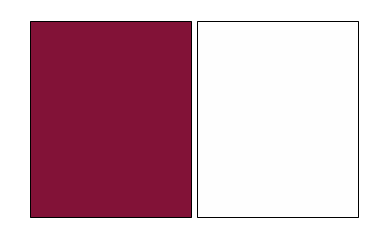

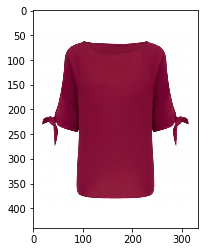

['brown', 'white']

In [13]:
image_array = mpimg.imread('./dark-red-dress.jpg')
pil_img = Image.open('./dark-red-dress.jpg')

colors = find_n_best_colors(2, image_array)
plot_colors_and_image(colors, pil_img)

named_colors = [get_closest_color(c, safe_map) for c in colors]

named_colors


In [14]:
def evaluate_image(path, n, evaluator):
    image_array = mpimg.imread(path)
    pil_img = Image.open(path)

    colors = evaluator(n, image_array)
    plot_colors_and_image(colors, pil_img)

    named_colors = [get_closest_color(c, safe_map) for c in colors]
    print(named_colors)

    return (named_colors, colors, pil_img)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


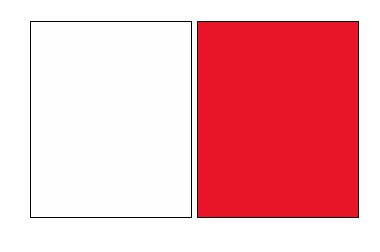

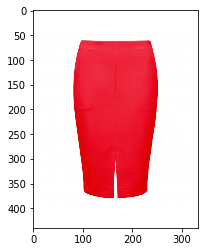

['white', 'crimson']


In [15]:
res = evaluate_image('./red-skirt.jpg', 2, find_n_best_colors)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


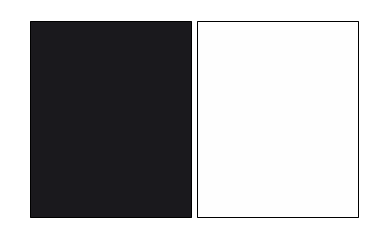

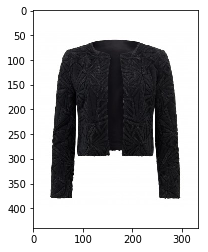

['black', 'white']


In [16]:
res = evaluate_image('./black-jacket.jpg', 2, find_n_best_colors)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


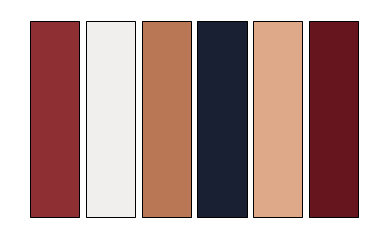

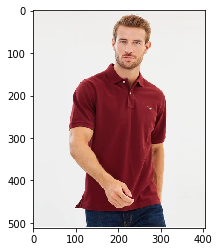

['brown', 'whitesmoke', 'peru', 'darkslategrey', 'burlywood', 'maroon']


In [17]:
res = evaluate_image('./red-shirt.jpg', 6, find_n_best_colors)

**NOTE**- fix for different color depths

figure out how to map alpha color correctly

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


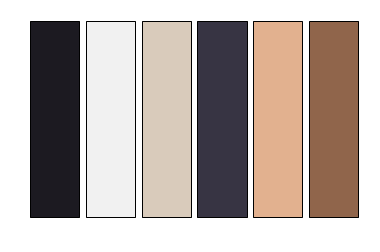

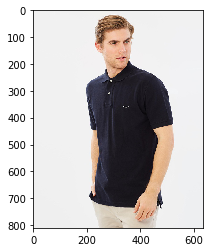

['black', 'whitesmoke', 'lightgrey', 'darkslategrey', 'burlywood', 'sienna']


In [18]:
res = evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors)

## Ordering colors

### Order by cluster size

In [19]:
def find_n_best_colors_cluster_size(n, image_array):
    image_array = np.array(image_array, dtype=np.float64) / 255 # convert to float and scale 0 - 1
    w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
    image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual
    
    image_array_sample = shuffle(image_array, random_state=0)[:1000] # sample 1000 random pixels
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample) # find n clusters
    centroids = kmeans.cluster_centers_

    ## Sort by most common
    unique_l, counts_l = np.unique(kmeans.labels_, return_counts=True)
    sort_ix = np.argsort(counts_l)
    sort_ix = sort_ix[::-1]
    
    sorted_centroids = centroids[sort_ix]
        
    return centroids

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


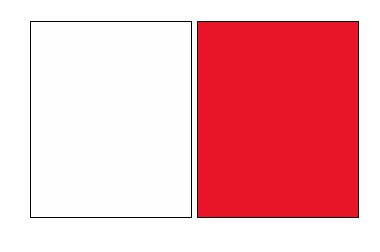

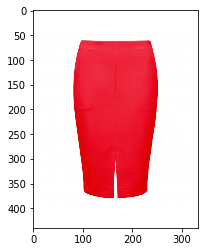

['white', 'crimson']


(['white', 'crimson'], array([[ 0.9975845 ,  0.99589886,  0.99595099],
        [ 0.90784921,  0.0807139 ,  0.15686275]]), <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x440 at 0x2CD0910B908>)

In [20]:
evaluate_image('./red-skirt.jpg', 2, find_n_best_colors_cluster_size)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


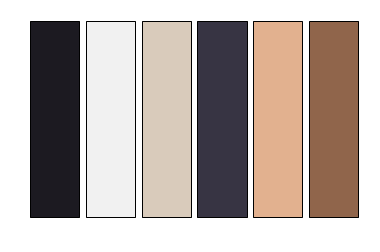

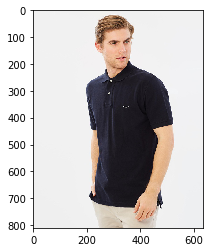

['black', 'whitesmoke', 'lightgrey', 'darkslategrey', 'burlywood', 'sienna']


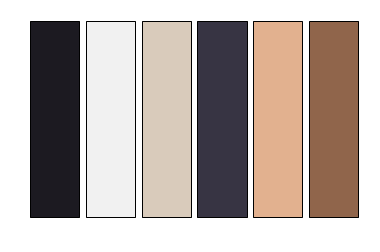

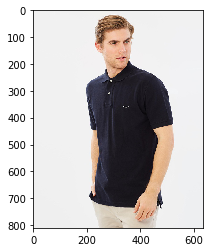

['black', 'whitesmoke', 'lightgrey', 'darkslategrey', 'burlywood', 'sienna']


(['black', 'whitesmoke', 'lightgrey', 'darkslategrey', 'burlywood', 'sienna'],
 array([[ 0.11173184,  0.10060248,  0.1289736 ],
        [ 0.94400294,  0.94408859,  0.94547123],
        [ 0.85212817,  0.79464371,  0.73371593],
        [ 0.21549953,  0.20532213,  0.26190476],
        [ 0.88585056,  0.69528352,  0.5608903 ],
        [ 0.56658142,  0.39522592,  0.29343564]]),
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=634x811 at 0x2CD0AC70A20>)

In [21]:
evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors)
evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors_cluster_size)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


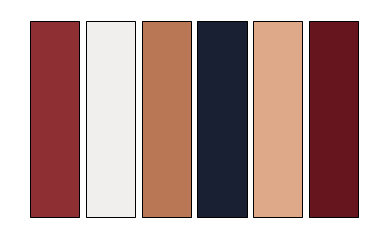

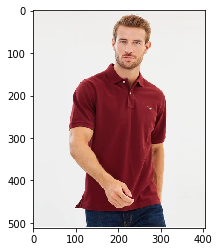

['brown', 'whitesmoke', 'peru', 'darkslategrey', 'burlywood', 'maroon']


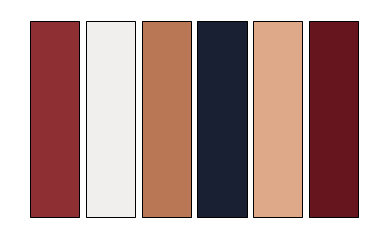

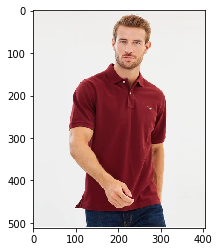

['brown', 'whitesmoke', 'peru', 'darkslategrey', 'burlywood', 'maroon']


(['brown', 'whitesmoke', 'peru', 'darkslategrey', 'burlywood', 'maroon'],
 array([[ 0.55116279,  0.18472412,  0.2004104 ,  1.        ],
        [ 0.93946725,  0.93739963,  0.93283711,  1.        ],
        [ 0.72689076,  0.46694678,  0.3372549 ,  1.        ],
        [ 0.09931973,  0.12621048,  0.20168067,  1.        ],
        [ 0.86999731,  0.6619393 ,  0.53881279,  1.        ],
        [ 0.40080442,  0.07798894,  0.11308195,  1.        ]]),
 <PIL.WebPImagePlugin.WebPImageFile image mode=RGBX size=406x512 at 0x2CD0B182BE0>)

In [22]:
evaluate_image('./red-shirt.jpg', 6, find_n_best_colors_cluster_size)
evaluate_image('./red-shirt.jpg', 6, find_n_best_colors)

This seems to not have any effect

### Order by reclassifying image and using largest cluster



In [23]:
def find_n_best_colors_cluster_size_original_image(n, image_array):
    image_array = np.array(image_array, dtype=np.float64) / 255 # convert to float and scale 0 - 1
    w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
    image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual
    
    image_array_sample = shuffle(image_array, random_state=0)[:1000] # sample 1000 random pixels
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(image_array_sample) # find n clusters
    ##centroids = kmeans.cluster_centers_

    res = kmeans.predict(image_array)
    
    unique_l, counts_l = np.unique(res, return_counts=True)
    sort_ix = np.argsort(counts_l)
    
    centroids = kmeans.cluster_centers_[sort_ix]
        
    return centroids

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


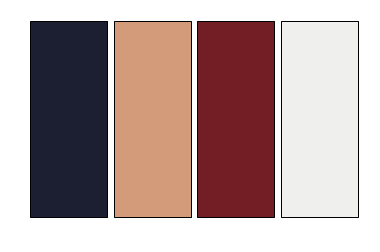

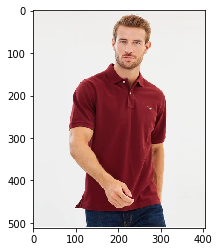

['darkslategrey', 'darksalmon', 'maroon', 'whitesmoke']


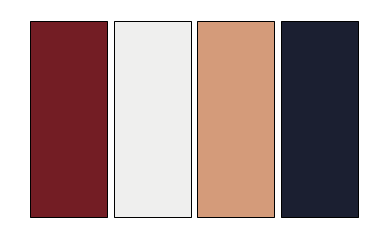

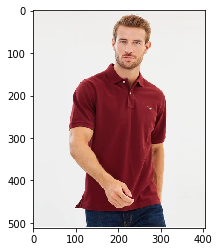

['maroon', 'whitesmoke', 'darksalmon', 'darkslategrey']


(['maroon', 'whitesmoke', 'darksalmon', 'darkslategrey'],
 array([[ 0.45047619,  0.11330532,  0.14172269,  1.        ],
        [ 0.93917455,  0.93654189,  0.93172906,  1.        ],
        [ 0.83255719,  0.60780229,  0.47994281,  1.        ],
        [ 0.10723982,  0.12073906,  0.19276018,  1.        ]]),
 <PIL.WebPImagePlugin.WebPImageFile image mode=RGBX size=406x512 at 0x2CD09187E10>)

In [24]:
evaluate_image('./red-shirt.jpg', 4, find_n_best_colors_cluster_size_original_image)
evaluate_image('./red-shirt.jpg', 4, find_n_best_colors)

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


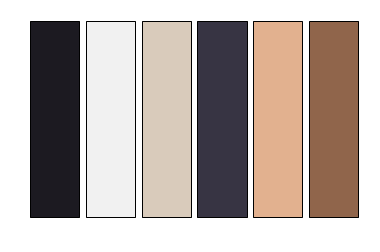

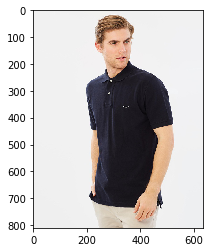

['black', 'whitesmoke', 'lightgrey', 'darkslategrey', 'burlywood', 'sienna']


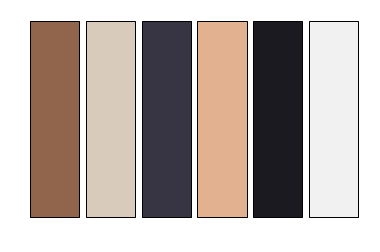

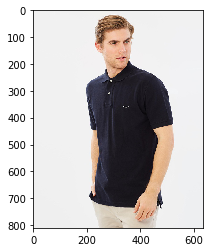

['sienna', 'lightgrey', 'darkslategrey', 'burlywood', 'black', 'whitesmoke']


(['sienna', 'lightgrey', 'darkslategrey', 'burlywood', 'black', 'whitesmoke'],
 array([[ 0.56658142,  0.39522592,  0.29343564],
        [ 0.85212817,  0.79464371,  0.73371593],
        [ 0.21549953,  0.20532213,  0.26190476],
        [ 0.88585056,  0.69528352,  0.5608903 ],
        [ 0.11173184,  0.10060248,  0.1289736 ],
        [ 0.94400294,  0.94408859,  0.94547123]]),
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=634x811 at 0x2CD0913EF98>)

In [25]:
evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors)
evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors_cluster_size_original_image)

still picking up alot of skin tones and background colors, try cropping the image

## Crop Center

In [26]:
def plot_image_array(array):
    
    array = np.vectorize(lambda x: x * 255)(array)
    
    img = Image.fromarray(np.uint8(array))
    
    plt.show()
    plt.imshow(img)
    plt.show()

def find_n_best_colors_cluster_size_original_image_cropped(n, image_array):
    image_array = np.array(image_array, dtype=np.float64) / 255 # convert to float and scale 0 - 1
    
    plot_image_array(image_array)
    
    w, h, d = original_shape = tuple(image_array.shape)
    
    print(w,h,d)
    
    # crop center half width and height
    image_array = image_array[(h//6):(2*h//2), (w//6):(3*w//6), :]
    
    
    plot_image_array(image_array)
    
    w, h, d = original_shape = tuple(image_array.shape) # width, height, color depth
    
    print(w,h,d)
    
    image_array = np.reshape(image_array, (w * h, d)) # reshape into list of individual
    
    image_array_sample = shuffle(image_array, random_state=0)[:1000] # sample 1000 random pixels
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(image_array_sample) # find n clusters
    ##centroids = kmeans.cluster_centers_

    res = kmeans.predict(image_array)
    
    unique_l, counts_l = np.unique(res, return_counts=True)
    sort_ix = np.argsort(counts_l)
    
    print(sort_ix)
    
    centroids = kmeans.cluster_centers_[sort_ix]
        
    return centroids

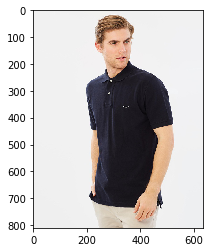

811 634 3


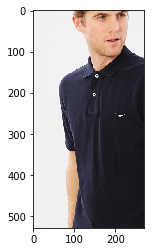

529 270 3
[0 5 3 4 1 2]


c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


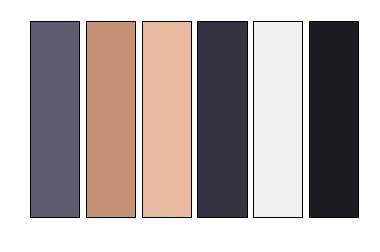

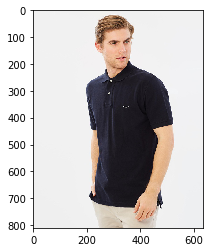

['dimgrey', 'rosybrown', 'burlywood', 'darkslategrey', 'whitesmoke', 'black']


(['dimgrey', 'rosybrown', 'burlywood', 'darkslategrey', 'whitesmoke', 'black'],
 array([[ 0.37647059,  0.36078431,  0.43769063],
        [ 0.77058824,  0.57222222,  0.45969499],
        [ 0.90985175,  0.73491153,  0.63022477],
        [ 0.20847059,  0.19946667,  0.26211765],
        [ 0.94651757,  0.94476103,  0.94528186],
        [ 0.11347142,  0.10276719,  0.13247169]]),
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=634x811 at 0x2CD0ADCDDD8>)

In [27]:
#evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors)
#evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors_cluster_size_original_image)
evaluate_image('./navy-shirt.jpeg', 6, find_n_best_colors_cluster_size_original_image_cropped)

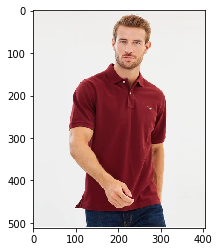

512 406 4


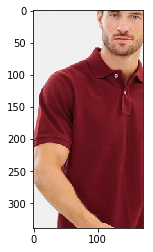

339 171 4
[1 0]


c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


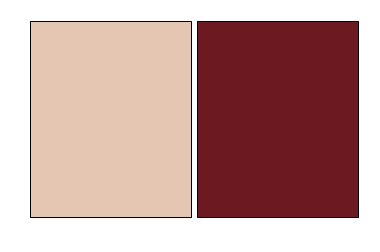

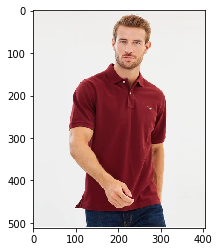

['wheat', 'maroon']


(['wheat', 'maroon'],
 array([[ 0.89344286,  0.77549264,  0.70361352,  1.        ],
        [ 0.42770631,  0.09918492,  0.13269829,  1.        ]]),
 <PIL.WebPImagePlugin.WebPImageFile image mode=RGBX size=406x512 at 0x2CD0913EA90>)

In [28]:
evaluate_image('./red-shirt.jpg', 2, find_n_best_colors_cluster_size_original_image_cropped)

## Use just PIL

In [29]:
def evaluate_image_pil(path, n, evaluator):
    pil_img = Image.open(path)
    image_array = np.array(pil_img)
    
    print(image_array.shape)

    colors = evaluator(n, image_array)
    plot_colors_and_image(colors, pil_img)

    named_colors = [get_closest_color(c, safe_map) for c in colors]
    print(named_colors)

    return (named_colors, colors, pil_img)

(512, 406, 4)


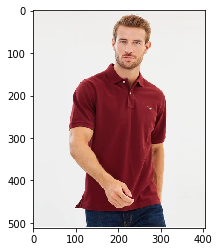

512 406 4


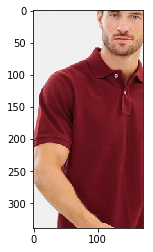

339 171 4
[1 0]


c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


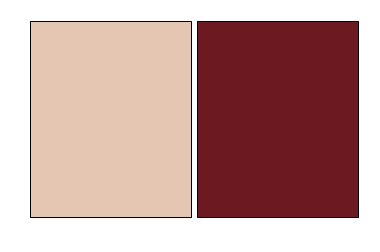

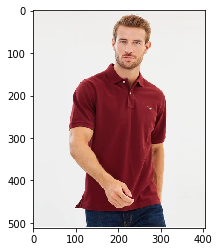

['wheat', 'maroon']


(['wheat', 'maroon'],
 array([[ 0.89344286,  0.77549264,  0.70361352,  1.        ],
        [ 0.42770631,  0.09918492,  0.13269829,  1.        ]]),
 <PIL.WebPImagePlugin.WebPImageFile image mode=RGBX size=406x512 at 0x2CD092F7A20>)

In [30]:
evaluate_image_pil('./red-shirt.jpg', 2, find_n_best_colors_cluster_size_original_image_cropped)

## Evaluate diffrent crops

In [31]:
def plot_PIL(img, title=''):
    
    img = np.asarray(img)
    
    plt.imshow(img)
    plt.title(title)
    plt.show()
    

# center crop
def crop_img(img, crop, display=True):
    (w, h) = img.size

    center_w = w // 2
    center_h = h // 2
    
    print('original size', img.size)
    plot_PIL(img)
    
    (w_crop, h_crop) = crop
    
    w_pixel = w_crop * w 
    h_pixel = h_crop * h
    
    left = (w - w_pixel) // 2
    top = (h - h_pixel) // 2
    right = (w + w_pixel) // 2
    bottom = (h + h_pixel) // 2
    
    
    img = img.crop((left, top, right, bottom))
        
    print('cropped size', img.size)
    plot_PIL(img)
    
    return img
    

def evaluate_image_crop(path, n, evaluator, crop=(1,1), display=True):
    pil_img = Image.open(path)
    
    pil_img = crop_img(pil_img, crop, display=display)
    
    image_array = np.array(pil_img)
    
    colors = evaluator(n, image_array)
    plot_colors_and_image(colors, pil_img)

    named_colors = [get_closest_color(c, safe_map) for c in colors]
    print(named_colors)

    return (named_colors, colors, pil_img)


original size (634, 811)


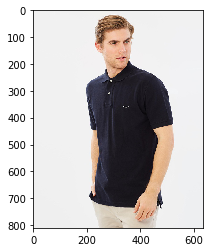

cropped size (159, 202)


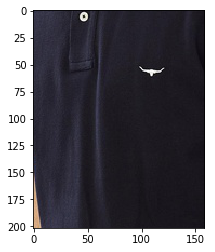

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


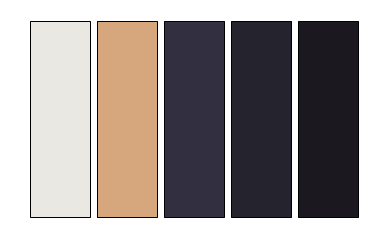

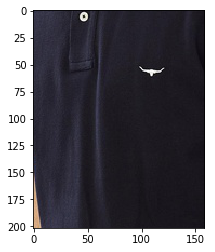

['beige', 'tan', 'darkslategrey', 'darkslategrey', 'black']


(['beige', 'tan', 'darkslategrey', 'darkslategrey', 'black'],
 array([[ 0.91372549,  0.91111111,  0.88496732],
        [ 0.84      ,  0.65490196,  0.4854902 ],
        [ 0.1959276 ,  0.18967895,  0.25085111],
        [ 0.14651741,  0.13753292,  0.18151888],
        [ 0.10745243,  0.0967875 ,  0.12344982]]),
 <PIL.Image.Image image mode=RGB size=159x202 at 0x2CD09286C88>)

In [32]:
evaluate_image_crop('./navy-shirt.jpeg', 5, find_n_best_colors_cluster_size_original_image, crop=(0.25,0.25), display=True)



using multiple categories to vote could be useful

original size (634, 811)


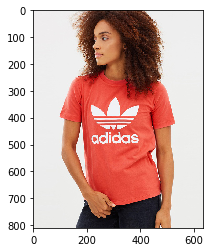

cropped size (159, 202)


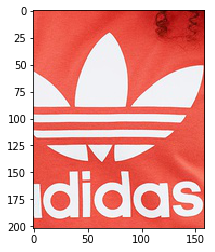

c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


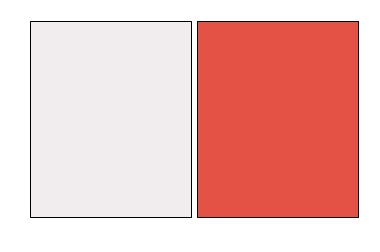

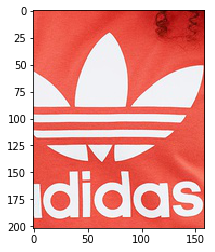

['whitesmoke', 'tomato']


(['whitesmoke', 'tomato'], array([[ 0.94575898,  0.92823309,  0.93865389],
        [ 0.89515893,  0.32064304,  0.27085617]]), <PIL.Image.Image image mode=RGB size=159x202 at 0x2CD0B15E550>)

In [33]:
evaluate_image_crop('./orange-test.jpg', 2, find_n_best_colors_cluster_size_original_image, crop=(0.25,0.25), display=True)


## Conclusion

It is possible to create a half decent model with a kmeans clustering

### Futher Improvements

* Diffrent sampling methods
    * blue noise
    * center weighted

* Diffrent clusting technics
    * research
    * try to take position into account
    
* Pre-processing
    * remove aliasing artifects
    * sharpen image
    * increase color intensity?
    
* Color Dictionaries
    * wikipedia